In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from PyDFN3D.Flow_Solver.PyBEM2D import PyBEM2D as BEMpy

## BEM solution

In [20]:

def RunIt(hsize=1/9,order="Quad",isPlot=True,SplitInt=False):
    BEM_Case1=BEMpy.BEM2D()

    #1.Build Mesh-#Anti-clock wise for internal domain
    Boundary_vert=[(0.0, 0.0), (1.0, 0.0),(1.0,1.0),(0.0,1.0)] 

    # Traces = [((0.12, 0.3), (0.12, 0.05)), ((0.05, 0.125), (0.2, 0.125)),
    #         ((0.0, 0.35), (1.0, 0.35)),  ((0.0,0.5),(0.9,0.5)), 
    #         ((0.2,0.46),(0.2,0.8)), ((0.75,0.1),(0.75,0.96)),
    #         ((0.45,0.63),(0.65,0.63)), ((0.8,0.67),(1.0,0.67)),
    #         ((0.1,0.74),(0.5,0.74)),((0.12,0.96),(0.12,0.8)),
    #         ((0.3,0.9),(0.85,0.9))]
    
    Traces = [((0.0, 0.25), (0.5, 0.0)), ((0.95, 0.0), (0.85, 0.2)),
            ((0.0, 0.75), (0.85, 0.0)),  ((0.2,0.25),(1.0,0.25)), 
            ((0.25,0.6),(0.2,1.0)), ((0.95,1.0),(0.75,0.6)),
            ((0.0,0.65),(1.0,0.35)), ((0.45,1.0),(0.5,0.6)),
            ((0.0,0.3),(1.0,0.65)), ((0.5,0.6),(1.0,0.5))]
    
    Trace_vert=Traces

    Source_vert=[(0.9,0.589)]

    element_esize=hsize #Edge mesh is important to overall mass balance
    element_tszie=element_esize/1.8 #Trace mesh size

    #BEM_Case1.set_Mesh(Boundary_vert,Trace_vert,Source_vert,element_esize,element_tszie,Type="Quad")

    BEM_Case1.set_Mesh(Boundary_vert,Trace_vert,Source_vert,element_esize,element_tszie,Type=order,split_edge=SplitInt,split_trace=False)

    # if(order=="Quad" and not SplitInt):
    #     BEM_Case1.BEs_trace[5][-1].d=1.0
    #     BEM_Case1.BEs_trace[3][0].d=1.0
    #     BEM_Case1.BEs_trace[1][-1].d=1.0


    #Check Mesh
    if(isPlot): BEM_Case1.plot_Mesh(node_size=4,Annotation=1,scale=2.0)

    #2.Set Boundary condition
    if(SplitInt):
        # bc0=[(38,-5)]
        # BEM_Case1.set_BoundaryCondition(DirichletBC=bc0)

        # def internalPres(Pts):
        #     x,y=Pts[0],Pts[1]
        #     return -5+8*np.sin(y)

        # bc_traces=[]
        # bc_traces_func = []
        # trace_sources=[36,37]
        # trace_sinks=[38]
        # for i in range(18,40):
        #     if(i in trace_sources):
        #         bc_traces+=[(i,3)]
        #     elif( i in trace_sinks):
        #         bc_traces+=[(i,-5)]
        #     else:
        #         bc_traces_func+=[(i,internalPres)]
        # BEM_Case1.set_BoundaryCondition(DirichletBC=bc_traces,update=1)
        # BEM_Case1.set_BoundaryCondition(DirichletBC=bc_traces_func,mode='func',update=1)

        # bc_sources=[(40,3)]
        # BEM_Case1.set_BoundaryCondition(DirichletBC=bc_sources,update=1)


        bc0=[(23,-5)]
        BEM_Case1.set_BoundaryCondition(DirichletBC=bc0)

        def internalPres(Pts):
            x,y=Pts[0],Pts[1]
            #return -5+8*np.sin(y)
            return -5+8*(1-y)

        bc_traces=[]
        bc_traces_func = []
        trace_sources=[18,19]
        trace_sinks=[22,23]
        for i in range(18,28):
            if(i in trace_sources):
                bc_traces+=[(i,3)]
            elif( i in trace_sinks):
                bc_traces+=[(i,-5)]
            else:
                bc_traces_func+=[(i,internalPres)]
        BEM_Case1.set_BoundaryCondition(DirichletBC=bc_traces,update=1)
        BEM_Case1.set_BoundaryCondition(DirichletBC=bc_traces_func,mode='func',update=1)

        bc_sources=[(28,3)]
        BEM_Case1.set_BoundaryCondition(DirichletBC=bc_sources,update=1)
    
    else:
        bc0=[(9,-5)]
        BEM_Case1.set_BoundaryCondition(DirichletBC=bc0)

        def internalPres(Pts):
            x,y=Pts[0],Pts[1]
            #return -5+8*np.sin(y)
            return -5+8*(1-y)

        bc_traces=[]
        bc_traces_func = []
        trace_sources=[4,5]
        trace_sinks=[8,9]
        for i in range(4,14):
            if(i in trace_sources):
                bc_traces+=[(i,3)]
            elif( i in trace_sinks):
                bc_traces+=[(i,-5)]
            else:
                bc_traces_func+=[(i,internalPres)]
        BEM_Case1.set_BoundaryCondition(DirichletBC=bc_traces,update=1)
        BEM_Case1.set_BoundaryCondition(DirichletBC=bc_traces_func,mode='func',update=1)

        bc_sources=[(14,3)]
        BEM_Case1.set_BoundaryCondition(DirichletBC=bc_sources,update=1)

    #3.Set Domain Properties - permeability tensor
    BEM_Case1.SetProps(k=3,miu=2)

    Ab=BEM_Case1.Solve()
    if(isPlot): xx=BEM_Case1.PostProcess.plot_Solution()
    #BEM_Case1.PostProcess.print_Solution()
    
    return BEM_Case1

Found 4 open ends for traces.
Trace 1 has open ends [0 1]
Trace 3 has open ends [1 0]
Trace 4 has open ends [1 0]
Trace 5 has open ends [0 1]
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:58(Total) 20(Edge) 37(Trace)
[Mesh] Number of Nodes:172(Total) 60(Edge) 111(Trace) 1(Source)
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(23, -5)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(18, 3), (19, 3), (22, -5), (23, -5)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(20, <function RunIt.<locals>.internalPres at 0x00000208C101D040>), (21, <function RunIt.<locals>.internalPres at 0x00000208C101D040>), (24, <function RunIt.<locals>.internalPres at 0x00000208C101D040>), (25, <function RunIt.<locals>.internalPres at 0x00000208C101D040>), (26, <function RunIt.<locals>.internalPres at 0x00000208C101D040>), (27, <function RunIt.<locals>.internalPres at 0x00000208C101D040>)]
[Boundary Con

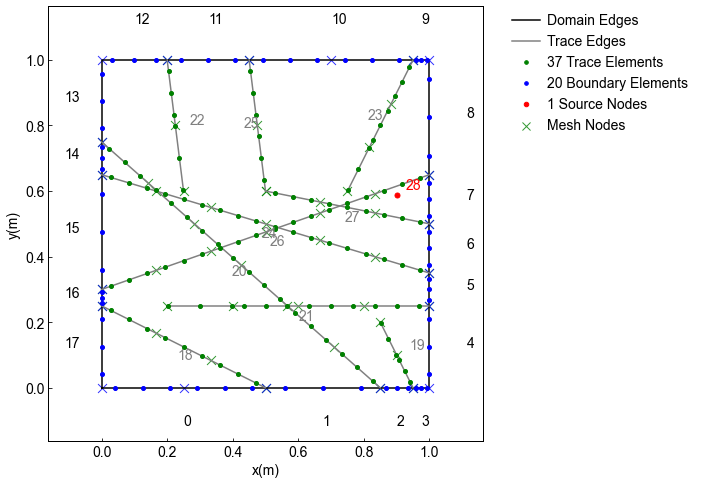

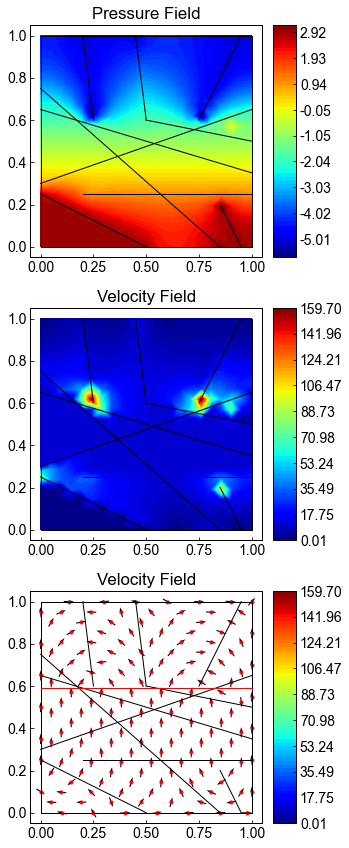

In [21]:
BEM_Case1=RunIt(hsize=1/2.7, order="Quad", isPlot=True, SplitInt=True)

In [329]:
P_refine,u_refine,v_refine=-2.394859708311529, -9.394556436960308, 1.8868599869558877
PUV=BEM_Case1.get_Solution((0.5,0.5))
Err_P=abs(PUV[0]-P_refine)/abs(P_refine)
Err_U=abs(PUV[1]-u_refine)/abs(u_refine) + abs(PUV[2]-v_refine)/v_refine

print("PUV",PUV)
print("Releative Err",Err_P,Err_U)

PUV (3.000065292276966, 0.024050415559661698, 0.009919032933770278)
Releative Err 2.2527102451408862 1.9973031380764423


In [33]:
import numpy as np
from utils import *
tol=1e-3
Pts1,Pts2=(0.0+tol,0.59),(1.0-tol,0.59)
#Pts1,Pts2=(0.0+tol,0.21),(1.0-tol,0.21)
#Pts1,Pts2=(0.95,0+tol),(0.95,1.0-tol)
#Pts1,Pts2=(0.0+tol,0.0+tol),(1.0-tol,1.0-tol)
Length = BEMpy.Tools.calcDist(Pts1,Pts2)

#BEM Solution
BEM_Const=RunIt(hsize=1/10,order="Const",isPlot=False,SplitInt=True)
PUV=BEM_Const.PostProcess.plot_Solution_overline(Pts1,Pts2,NumSamples=1000, plot=False)
np.savetxt(".\\Verification\\UnitSquareBEM_Const_PUV.csv", PUV, delimiter=",")

#BEM Solution refine
BEM_Quad=RunIt(hsize=1/2.7,order="Quad",isPlot=False,SplitInt=True)
PUV_Quad=BEM_Quad.PostProcess.plot_Solution_overline(Pts1,Pts2,NumSamples=1000,plot=False)
np.savetxt(".\\Verification\\UnitSquareBEM_Quad_PUV.csv", PUV, delimiter=",")

Found 4 open ends for traces.
Trace 1 has open ends [0 1]
Trace 3 has open ends [1 0]
Trace 4 has open ends [1 0]
Trace 5 has open ends [0 1]
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:173(Total) 46(Edge) 126(Trace)
[Mesh] Number of Nodes:173(Total) 46(Edge) 126(Trace) 1(Source)
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(23, -5)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(18, 3), (19, 3), (22, -5), (23, -5)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(20, <function RunIt.<locals>.internalPres at 0x00000208C3F45B80>), (21, <function RunIt.<locals>.internalPres at 0x00000208C3F45B80>), (24, <function RunIt.<locals>.internalPres at 0x00000208C3F45B80>), (25, <function RunIt.<locals>.internalPres at 0x00000208C3F45B80>), (26, <function RunIt.<locals>.internalPres at 0x00000208C3F45B80>), (27, <function RunIt.<locals>.internalPres at 0x00000208C3F45B80>)]
[Boundary C

## Solution Verification

In [35]:
#Max element size = 0.005, open adapt
PFEM_LGR = np.genfromtxt('.\\Verification\\UnitSquareTS_p.csv', comments='%',delimiter=',')
uFEM_LGR  = np.genfromtxt('.\\Verification\\UnitSquareTS_u.csv', comments='%',delimiter=',')
vFEM_LGR  = np.genfromtxt('.\\Verification\\UnitSquareTS_v.csv', comments='%',delimiter=',')

-----------------Pressure over line-----------------


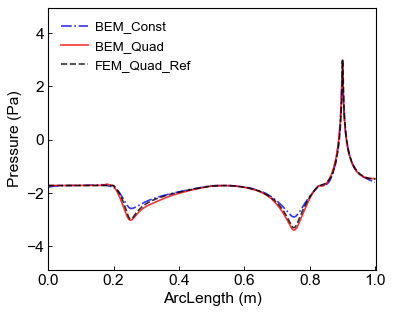

-----------------Velocity over line-----------------


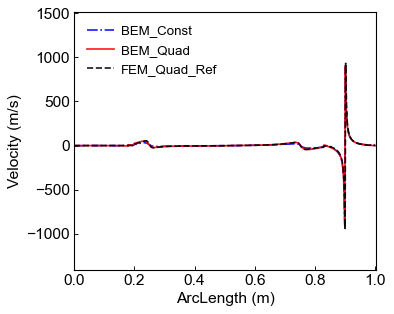

-----------------Velocity over line-----------------


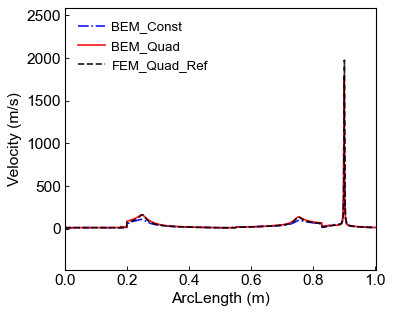

-----------------Velocity Magn over line-----------------


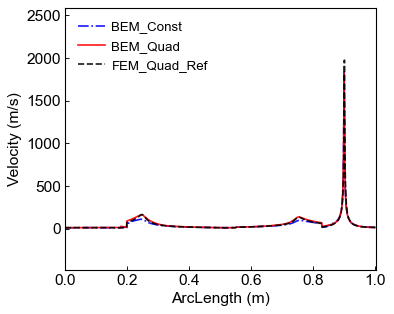

In [36]:
DataSetName=['BEM_Const','BEM_Quad','FEM_Quad_Ref']

space=1
ArcLength=[PUV[::space,0],PUV_Quad[::space,0], PFEM_LGR[::space,0]]

Pressure=[PUV[::space,1],PUV_Quad[::space,1],PFEM_LGR[::space,1]]
vmin,vmax = np.min(Pressure[-1]),np.max(Pressure[-1])
vmin-=0.25*(vmax-vmin)
vmax+=0.25*(vmax-vmin)

print("-----------------Pressure over line-----------------")
plotTables(X=ArcLength,Y=Pressure, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Pressure (Pa)',Xlim=[0,Length*1.005],Ylim=[vmin,vmax],
           Alpha=[0.8]*len(DataSetName),
           MarkerSize=[0,0,0,0,0],LineWidth=[1.5,1.5,1.5,1.5,1.5],
           img_fname='Case2_PressureOverLine.pdf')


Velocity=[PUV[::space,2],PUV_Quad[::space,2],uFEM_LGR[::space,1]]

vmin,vmax = np.min(Velocity[-1]),np.max(Velocity[-1])
vmin-=0.25*(vmax-vmin)
vmax+=0.25*(vmax-vmin)

print("-----------------Velocity over line-----------------")
plotTables(X=ArcLength,Y=Velocity, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Velocity (m/s)',Xlim=[0,Length*1.005],Ylim=[vmin,vmax],
           Alpha=[0.9]*len(DataSetName),
           MarkerSize=[0,0,0,0,0],LineWidth=[1.5,1.5,1.5,1.5,1.5],
           img_fname='Case2_VelocityXOverLine.pdf')



Velocity=[PUV[::space,3],PUV_Quad[::space,3],vFEM_LGR[::space,1]]

vmin,vmax = np.min(Velocity[-1]),np.max(Velocity[-1])
vmin-=0.25*(vmax-vmin)
vmax+=0.25*(vmax-vmin)

print("-----------------Velocity over line-----------------")
plotTables(X=ArcLength,Y=Velocity, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Velocity (m/s)',Xlim=[0,Length*1.005],Ylim=[vmin,vmax],
           Alpha=[0.9]*len(DataSetName),
           MarkerSize=[0,0,0,0,0],LineWidth=[1.5,1.5,1.5,1.5,1.5],
           img_fname='Case2_VelocityYOverLine.pdf')



Velocity=[np.sqrt(PUV[::space,3]**2+PUV[::space,2]**2),
          np.sqrt(PUV_Quad[::space,3]**2+PUV_Quad[::space,2]**2),
          np.sqrt(uFEM_LGR[::space,1]**2+vFEM_LGR[::space,1]**2)]

vmin,vmax = np.min(Velocity[-1]),np.max(Velocity[-1])
vmin-=0.25*(vmax-vmin)
vmax+=0.25*(vmax-vmin)

print("-----------------Velocity Magn over line-----------------")
plotTables(X=ArcLength,Y=Velocity, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Velocity (m/s)',Xlim=[0,Length*1.005],Ylim=[vmin,vmax],
           Alpha=[0.9]*len(DataSetName),
           MarkerSize=[0,0,0,0,0],LineWidth=[1.5,1.5,1.5,1.5,1.5],
           img_fname='Case2_VelocityMagnOverLine.pdf')

In [37]:
PFEM_norm = np.genfromtxt('.\\Verification\\UnitSquareTS_p.csv', comments='%',delimiter=',')
uFEM_norm  = np.genfromtxt('.\\Verification\\UnitSquareTS_u.csv', comments='%',delimiter=',')
vFEM_norm  = np.genfromtxt('.\\Verification\\UnitSquareTS_v.csv', comments='%',delimiter=',')

-----------------Pressure over line-----------------


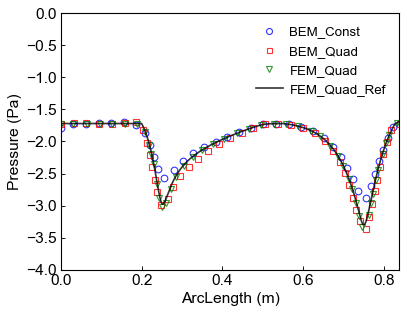

-----------------Velocity Magn over line-----------------


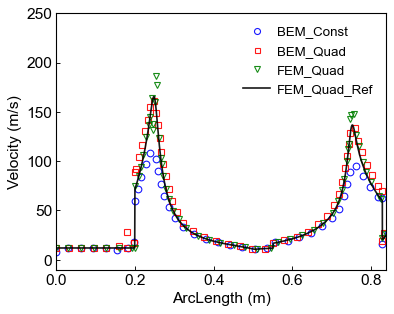

In [108]:
DataSetName=['BEM_Const','BEM_Quad','FEM_Quad','FEM_Quad_Ref']

ArcLength=[PUV[::space,0],PUV_Quad[::space,0], PFEM_norm[::space,0],PFEM_LGR[::space,0]]

Pressure=[PUV[::space,1],PUV_Quad[::space,1],PFEM_norm[::space,1],PFEM_LGR[::space,1]]
vmin,vmax = np.min(Pressure[-1]),np.max(Pressure[-1])
vmin-=0.2*(vmax-vmin)
vmax+=0.35*(vmax-vmin)

print("-----------------Pressure over line-----------------")
plotTables(X=ArcLength,Y=Pressure, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Pressure (Pa)',Xlim=[Length*0,Length*0.84],Ylim=[-4,0],
           Alpha=[0.8]*len(DataSetName),Colors = ['b', 'r','g','k'],
           MarkerSize=[6,5,6,0,0],LineWidth=[0,0,0,1.5,1.5],markEvery=0.03,
           img_fname='Case2_PressureOverLine.pdf')


# Velocity=[PUV[::space,2],PUV_Quad[::space,2],uFEM_norm[::space,1],uFEM_LGR[::space,1]]

# vmin,vmax = np.min(Velocity[-1]),np.max(Velocity[-1])
# vmin-=0.2*(vmax-vmin)
# vmax+=0.4*(vmax-vmin)

# print("-----------------Velocity over line-----------------")
# plotTables(X=ArcLength,Y=Velocity, DataNames=DataSetName,
#            XLable='ArcLength (m)',YLabel='Velocity (m/s)',Xlim=[0,Length*1.005],Ylim=[vmin,vmax],
#            Alpha=[0.9]*len(DataSetName),Colors = ['b', 'r','g','k'],
#            MarkerSize=[6,5,6,0,0],LineWidth=[0,0,0,1.5,1.5],markEvery=0.03,
#            img_fname='Case2_VelocityXOverLine.pdf')



# Velocity=[PUV[::space,3],PUV_Quad[::space,3],vFEM_norm[::space,1],vFEM_LGR[::space,1]]

# vmin,vmax = np.min(Velocity[-1]),np.max(Velocity[-1])
# vmin-=0.2*(vmax-vmin)
# vmax+=0.4*(vmax-vmin)

# print("-----------------Velocity over line-----------------")
# plotTables(X=ArcLength,Y=Velocity, DataNames=DataSetName,
#            XLable='ArcLength (m)',YLabel='Velocity (m/s)',Xlim=[0,Length*1.005],Ylim=[vmin,vmax],
#            Alpha=[0.9]*len(DataSetName),Colors = ['b', 'r','g','k'],
#            MarkerSize=[6,5,6,0,0],LineWidth=[0,0,0,1.5,1.5],markEvery=0.03,
#            img_fname='Case2_VelocityYOverLine.pdf')



Velocity=[np.sqrt(PUV[::space,3]**2+PUV[::space,2]**2),
          np.sqrt(PUV_Quad[::space,3]**2+PUV_Quad[::space,2]**2),
          np.sqrt(uFEM_norm[::space,1]**2+vFEM_norm[::space,1]**2),
          np.sqrt(uFEM_LGR[::space,1]**2+vFEM_LGR[::space,1]**2)]

vmin,vmax = np.min(Velocity[-1]),np.max(Velocity[-1])
vmin-=0.25*(vmax-vmin)
vmax+=0.25*(vmax-vmin)

print("-----------------Velocity Magn over line-----------------")
plotTables(X=ArcLength,Y=Velocity, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Velocity (m/s)',Xlim=[Length*0,Length*0.84],Ylim=[-10,250],
           Alpha=[0.9]*len(DataSetName),Colors = ['b', 'r','g','k'],
           MarkerSize=[6,5,6,0,0],LineWidth=[0,0,0,1.5,1.5],markEvery=0.03,
           img_fname='Case2_VelocityMagnOverLine.pdf')

-----------------Pressure over line-----------------


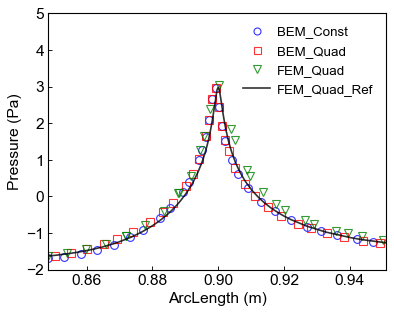

-----------------Velocity Magn over line-----------------


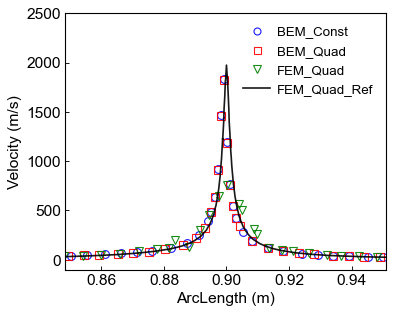

In [107]:
DataSetName=['BEM_Const (DOFs=173)','BEM_Quad(DOFs=173)','FEM_Quad(DOFs=13982)',r'FEM_Quad_Ref(DOFs=1E6)']
DataSetName=['BEM_Const','BEM_Quad','FEM_Quad',r'FEM_Quad_Ref']

ArcLength=[PUV[::space,0],PUV_Quad[::space,0], PFEM_norm[::space,0],PFEM_LGR[::space,0]]

Pressure=[PUV[::space,1],PUV_Quad[::space,1],PFEM_norm[::space,1],PFEM_LGR[::space,1]]
vmin,vmax = np.min(Pressure[-1]),np.max(Pressure[-1])
vmin-=0.2*(vmax-vmin)
vmax+=0.35*(vmax-vmin)

print("-----------------Pressure over line-----------------")
plotTables(X=ArcLength,Y=Pressure, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Pressure (Pa)',Xlim=[Length*0.85,Length*0.953],Ylim=[-2,5],
           Alpha=[0.8]*len(DataSetName),Colors = ['b', 'r','g','k'],
           MarkerSize=[7,7,8,0,0],LineWidth=[0,0,0,1.5,1.5],markEvery=0.04,
           img_fname='Case2_PressureOverLineSource.pdf')


# Velocity=[PUV[::space,2],PUV_Quad[::space,2],uFEM_norm[::space,1],uFEM_LGR[::space,1]]

# vmin,vmax = np.min(Velocity[-1]),np.max(Velocity[-1])
# vmin-=0.2*(vmax-vmin)
# vmax+=0.4*(vmax-vmin)

# print("-----------------Velocity over line-----------------")
# plotTables(X=ArcLength,Y=Velocity, DataNames=DataSetName,
#            XLable='ArcLength (m)',YLabel='Velocity (m/s)',Xlim=[Length*0.85,Length*0.95],Ylim=[vmin,vmax],
#            Alpha=[0.9]*len(DataSetName),Colors = ['b', 'r','g','k'],
#            MarkerSize=[6,5,6,0,0],LineWidth=[0,0,0,1.5,1.5],markEvery=0.03,
#            img_fname='Case2_VelocityXOverLine.pdf')



# Velocity=[PUV[::space,3],PUV_Quad[::space,3],vFEM_norm[::space,1],vFEM_LGR[::space,1]]

# vmin,vmax = np.min(Velocity[-1]),np.max(Velocity[-1])
# vmin-=0.2*(vmax-vmin)
# vmax+=0.4*(vmax-vmin)

# print("-----------------Velocity over line-----------------")
# plotTables(X=ArcLength,Y=Velocity, DataNames=DataSetName,
#            XLable='ArcLength (m)',YLabel='Velocity (m/s)',Xlim=[Length*0.85,Length*0.95],Ylim=[vmin,vmax],
#            Alpha=[0.9]*len(DataSetName),Colors = ['b', 'r','g','k'],
#            MarkerSize=[6,5,6,0,0],LineWidth=[0,0,0,1.5,1.5],markEvery=0.03,
#            img_fname='Case2_VelocityYOverLine.pdf')



Velocity=[np.sqrt(PUV[::space,3]**2+PUV[::space,2]**2),
          np.sqrt(PUV_Quad[::space,3]**2+PUV_Quad[::space,2]**2),
          np.sqrt(uFEM_norm[::space,1]**2+vFEM_norm[::space,1]**2),
          np.sqrt(uFEM_LGR[::space,1]**2+vFEM_LGR[::space,1]**2)]

vmin,vmax = np.min(Velocity[-1]),np.max(Velocity[-1])
vmin-=0.25*(vmax-vmin)
vmax+=0.25*(vmax-vmin)

print("-----------------Velocity Magn over line-----------------")
plotTables(X=ArcLength,Y=Velocity, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Velocity (m/s)',Xlim=[Length*0.85,Length*0.953],Ylim=[-100,2500],
           Alpha=[0.9]*len(DataSetName),Colors = ['b', 'r','g','k'],
           MarkerSize=[7,7,8,0,0],LineWidth=[0,0,0,1.5,1.5],markEvery=0.04,
           img_fname='Case2_VelocityMagnOverLineSource.pdf')

In [598]:
def compareSolution(BEMs,resolution=20):
    #Compute the error map between two BEM solution
    Mesh = BEMs[0].Mesh
    Pts, triang = BEMpy.Tools.GetPtsInPolygon(Mesh.Pts_e, resolution)
    
    PFEM_ref = np.genfromtxt('.\\Verification\\UnitSquareSampleP.csv', comments='%',delimiter=',')
    UFEM_ref = np.genfromtxt('.\\Verification\\UnitSquareSampleU.csv', comments='%',delimiter=',')
    VFEM_ref = np.genfromtxt('.\\Verification\\UnitSquareSampleV.csv', comments='%',delimiter=',')

    N=len(Pts)

    RMSE= []

    Ps=[]
    Us=[]
    for BEM in BEMs:
        p = np.empty(N, dtype=float)
        u = np.empty(N, dtype=float)
        
        P_error=0
        U_error=0
        for i in range(N):
            puv=BEM.get_Solution(Pts[i])
            
            p[i] = (puv[0]-PFEM_ref[i])*(puv[0]-PFEM_ref[i])#/np.abs(PFEM_ref[i]+puv[0])
            u[i] = np.abs(puv[1]-PFEM_ref[i])+np.abs(puv[2]-VFEM_ref[i])#/np.abs(UFEM_ref[i]+puv[1])
            P_error+=p[i]
            U_error+=u[i]
        
        P_error=np.sqrt(P_error/N)
        U_error=np.sqrt(U_error/N)
        
        Ps+=[p]
        Us+=[u]
        RMSE+=[(P_error,U_error)]
    
    NumPlots=len(BEMs)
    fig, axes = plt.subplots(nrows=NumPlots,figsize=(5*NumPlots, 4*NumPlots))
    
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    for i, ax in enumerate(axes.flat):
            ax.set(aspect='equal')

            #Background Mesh
            ax.plot(*np.asarray(list(Mesh.Pts_e) + [Mesh.Pts_e[0]]).T, 'k-',lw=1)
            for ti in range(Mesh.Num_trace):
                ax.plot(*np.asarray(Mesh.Pts_t[ti]).T, 'k-',lw=1)
        
            ax.set_title(r'Relative Error Field')
            var = Ps[i]
            v_range = [np.min(var),np.max(var)]
            level = np.linspace(v_range[0], v_range[1], 64, endpoint=True)
            im = ax.tricontourf(triang, var, level, cmap=plt.cm.jet)
            divider = make_axes_locatable(ax)
            cax2=divider.append_axes("right", "10%", pad=0.15)
            cbar2 = plt.colorbar(im, cax=cax2,format="%.2f")
            
            ax.use_sticky_edges = False
            ax.margins(0.05)
    
    return RMSE

[(4.770511671177174, 6.424446029017904),
 (4.781389464396028, 6.458962289280945)]

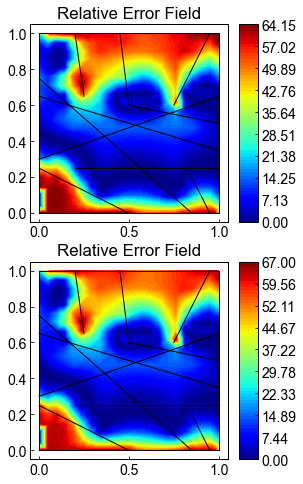

In [600]:
SamplePts, triang = BEMpy.Tools.GetPtsInPolygon(BEM_Const.Mesh.Pts_e, resolution=20)
np.savetxt(".\\Verification\\UnitSquareSamplePts.txt", SamplePts, delimiter=",")

compareSolution(BEMs=[BEM_Const, BEM_Quad], resolution=20)

-----------------Pressure over line-----------------


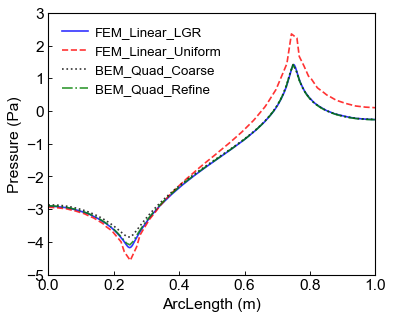

-----------------Velocity over line-----------------


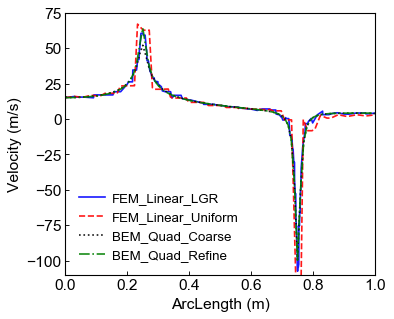

In [7]:
from utils import *

PFEM_uniform = np.genfromtxt('.\\Verification\\UnitSquareTS_pc.csv', comments='%',delimiter=',')
uFEM_uniform  = np.genfromtxt('.\\Verification\\UnitSquareTS_uc.csv', comments='%',delimiter=',')
vFEM_uniform  = np.genfromtxt('.\\Verification\\UnitSquareTS_vc.csv', comments='%',delimiter=',')

PFEM_LGR = np.genfromtxt('.\\Verification\\UnitSquareTS_p.csv', comments='%',delimiter=',')
uFEM_LGR  = np.genfromtxt('.\\Verification\\UnitSquareTS_u.csv', comments='%',delimiter=',')
vFEM_LGR  = np.genfromtxt('.\\Verification\\UnitSquareTS_v.csv', comments='%',delimiter=',')

PUV_BEM_coarse=np.genfromtxt('.\\Verification\\UnitSquareBEM20_PUV.csv', comments='%',delimiter=',')
PUV_BEM_refine=np.genfromtxt('.\\Verification\\UnitSquareBEM97_PUV.csv', comments='%',delimiter=',')


DataSetName=['FEM_Linear_LGR','FEM_Linear_Uniform','BEM_Quad_Coarse','BEM_Quad_Refine']
space=1
ArcLength=[PFEM_LGR[::space,0],PFEM_uniform[::space,0],PUV_BEM_coarse[::space,0],PUV_BEM_refine[::space,0]]
Pressure=[PFEM_LGR[::space,1],PFEM_uniform[::space,1],PUV_BEM_coarse[::space,1],PUV_BEM_refine[::space,1]]

print("-----------------Pressure over line-----------------")
plotTables(X=ArcLength,Y=Pressure, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Pressure (Pa)',Xlim=[0,1],Ylim=[-5,3],
           Alpha=[0.8]*len(DataSetName),
           MarkerSize=[0,0,0,0,0],LineWidth=[1.5,1.5,1.5,1.5,1.5],
           img_fname='Case2_PressureOverLine.pdf')


Velocity=[vFEM_LGR[::space,1],vFEM_uniform[::space,1],PUV_BEM_coarse[::space,3],PUV_BEM_refine[::space,3]]

print("-----------------Velocity over line-----------------")
plotTables(X=ArcLength,Y=Velocity, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Velocity (m/s)',Xlim=[0,1],Ylim=[-110,75],
           Alpha=[0.9]*len(DataSetName),
           MarkerSize=[0,0,0,0,0],LineWidth=[1.5,1.5,1.5,1.5,1.5],
           img_fname='Case2_VelocityYOverLine.pdf')

[Visulization] Plotting Solution


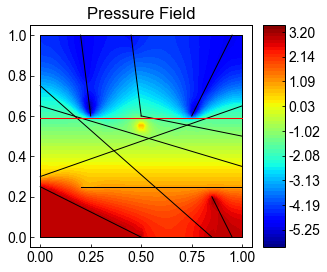

In [689]:
xx=BEM_Quad.PostProcess.plot_Solution(resolution=60,p_range=(-6,3.5),SubPlots=['P'])

plt.savefig('Case2_Pressure_Field.pdf',dpi=300,bbox_inches='tight')
plt.show()      

[Visulization] Plotting Solution


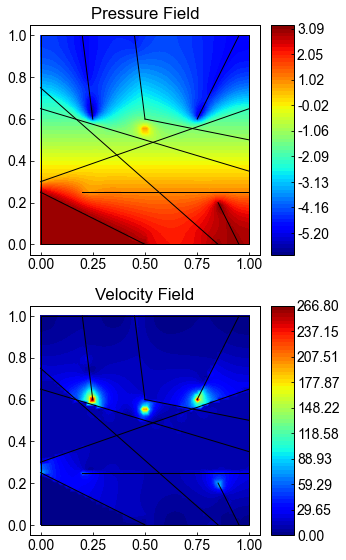

In [644]:
xx=BEM_Quad.PostProcess.plot_Solution(resolution=60,SubPlots=['P','U'],img_fname='Case2_Pressure_Field.pdf')

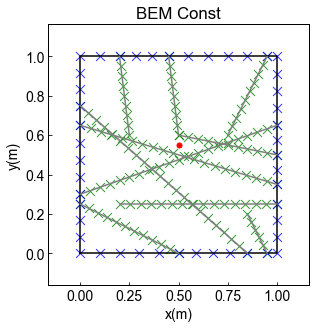

In [679]:
BEM_Const.plot_Mesh(Annotation=0,legend=0,node_size=0,scale=1.2)

plt.title('BEM Const')
plt.savefig('Case2_BEM_Mesh_Const.pdf',dpi=300,bbox_inches='tight')
plt.show()

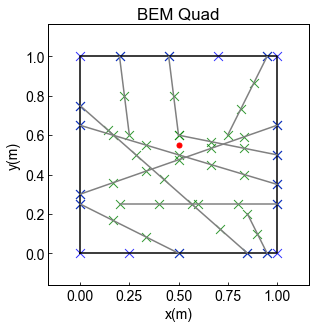

In [673]:
BEM_Quad.plot_Mesh(Annotation=0,legend=0,node_size=0,scale=1.2)
plt.title('BEM Quad')
plt.savefig('Case2_BEM_Mesh_Quad.pdf',dpi=300,bbox_inches='tight')
plt.show()